In [1]:
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satyamtiwari345","key":"6c27c82a83342fb95cf467f537fdad1f"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [8]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d devanshusingh/hand-written-digits-for-object-detection

 78% 24.0M/30.8M [00:00<00:00, 108MB/s] 
100% 30.8M/30.8M [00:00<00:00, 105MB/s]


In [ ]:
!unzip hand-written-digits-for-object-detection.zip

In [12]:
import os
import cv2 as cv
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Dense, GlobalAveragePooling2D, Input
from keras.models import Sequential, Model
from sklearn.metrics import mean_absolute_error

In [13]:
df = pd.read_csv('/content/train_label.csv')

In [14]:
df.head()

,image_path,label,x_mark,y_mark,width,height
0,0.png,5,23.0,0.0,51.0,28.0
1,1.png,0,43.0,34.0,71.0,62.0
2,2.png,4,43.0,23.0,71.0,51.0
3,3.png,1,3.0,27.0,31.0,55.0
4,4.png,9,32.0,12.0,60.0,40.0


In [15]:
data = {}                                          # appending the bbox cordinates into the data dictionary
for idx, names in enumerate(df["image_path"]):
  if names not in data:
    data["train/train/" + names] = []
    x1 = int(df["x_mark"][idx])
    y1 = int(df["y_mark"][idx])
    x2 = int(df["width"][idx])
    y2 = int(df["height"][idx])
    data["train/train/" + names].append(x1)
    data["train/train/" + names].append(y1)
    data["train/train/" + names].append(x2)
    data["train/train/" + names].append(y2)

In [16]:
images = []                       # appending the images into the images array 
for keys in data.keys():
  img_arr = cv.imread(keys, cv.IMREAD_GRAYSCALE)
  images.append(img_arr)

In [17]:
bbox = []
for bboxs in data.keys():
  bbox.append(data[bboxs])

In [18]:
images = np.array(images)
bbox = np.array(bbox)

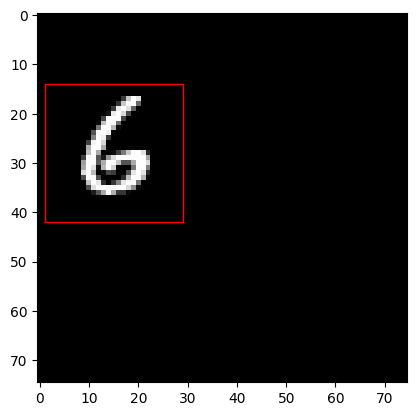

In [19]:
def test_plot(img_number):
    x1 = bbox[img_number][0]
    y1 = bbox[img_number][1]
    width = bbox[img_number][2]
    height = bbox[img_number][3]
    plt.subplot(1,1,1)
    plt.imshow(images[img_number], cmap='gray')
    plt.gca().add_patch(patches.Rectangle((x1, y1), width-x1, height-y1, edgecolor='r', facecolor="none", linewidth=1))
plt.show()
test_plot(6000)

In [20]:
images = np.expand_dims(images, axis=3)       # adding a new axis to the images array

In [21]:
images = images/255             # normalising the images

**Splitting and Model Building**

In [22]:
x_train, x_test, y_train, y_test = train_test_split(images, bbox, test_size=0.2, random_state=44)

In [23]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(75,75,1), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation="relu"))
model.add(Dense(4, activation="relu"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [25]:
class CustomCallbacks(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    num = np.random.randint(0, 10000)
    bbox = model.predict(x_test[num].reshape(1, 75, 75, 1))
    fig, ax = plt.subplots(1)
    ax.imshow(x_test[num])
    x1 = int(bbox[0][0])
    y1 = int(bbox[0][1])
    x2 = int(bbox[0][2])
    y2 = int(bbox[0][3])
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r',facecolor="none")
    ax.add_patch(rect)
    plt.show()

In [26]:
model.compile(optimizer="adam", loss='mae')

Epoch 1/30
1/1 [==============================] - 0s 160ms/step


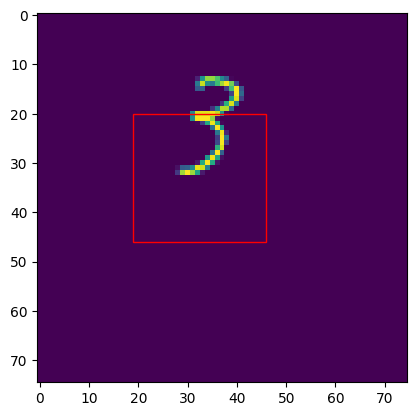

1500/1500 [==============================] - 446s 296ms/step - loss: 23.6191 - val_loss: 5.8682
Epoch 2/30
1/1 [==============================] - 0s 24ms/step


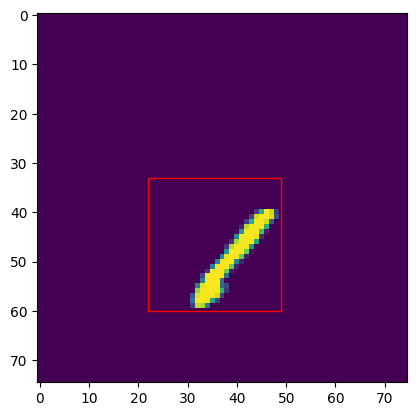

1500/1500 [==============================] - 453s 302ms/step - loss: 5.3963 - val_loss: 4.9138
Epoch 3/30
1/1 [==============================] - 0s 22ms/step


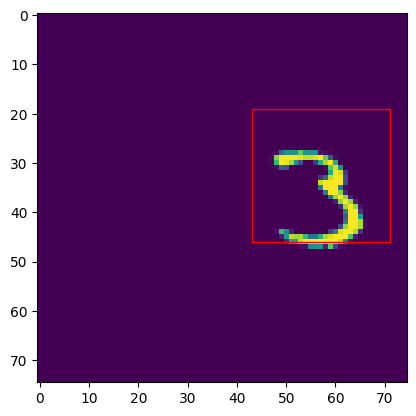

1500/1500 [==============================] - 435s 290ms/step - loss: 4.7966 - val_loss: 4.6008
Epoch 4/30
1/1 [==============================] - 0s 23ms/step


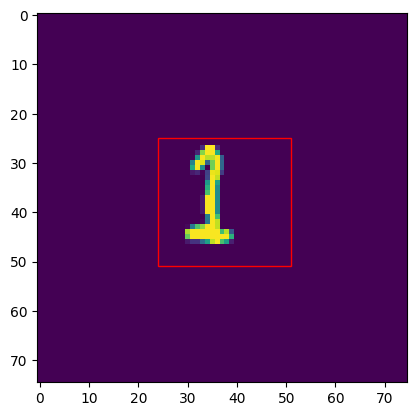

1500/1500 [==============================] - 439s 293ms/step - loss: 4.5449 - val_loss: 4.4179
Epoch 5/30
1/1 [==============================] - 0s 37ms/step


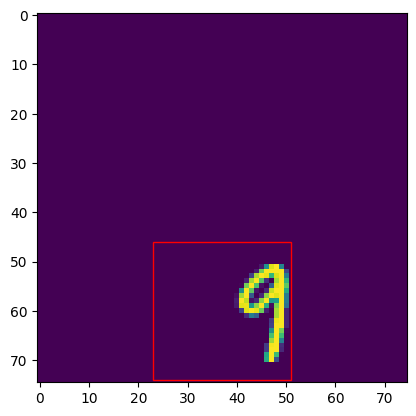

1500/1500 [==============================] - 434s 289ms/step - loss: 4.4172 - val_loss: 4.4198
Epoch 6/30
1/1 [==============================] - 0s 23ms/step


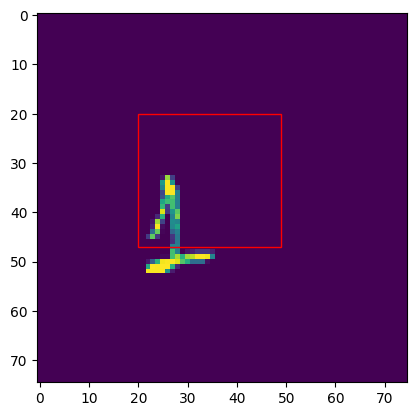

1500/1500 [==============================] - 435s 290ms/step - loss: 4.3322 - val_loss: 4.4379
Epoch 7/30
1/1 [==============================] - 0s 25ms/step


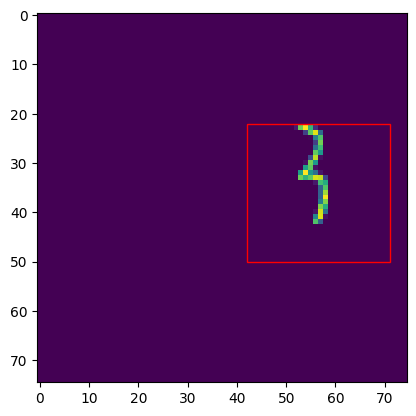

1500/1500 [==============================] - 435s 290ms/step - loss: 4.2794 - val_loss: 4.6791
Epoch 8/30
1/1 [==============================] - 0s 22ms/step


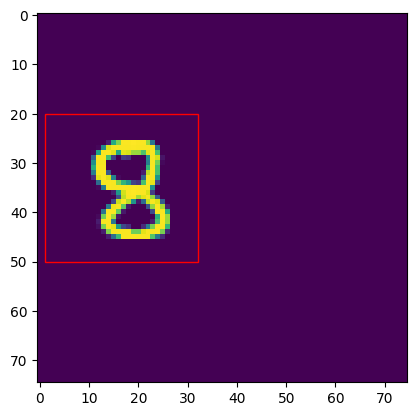

1500/1500 [==============================] - 435s 290ms/step - loss: 4.2188 - val_loss: 4.2430
Epoch 9/30
1/1 [==============================] - 0s 36ms/step


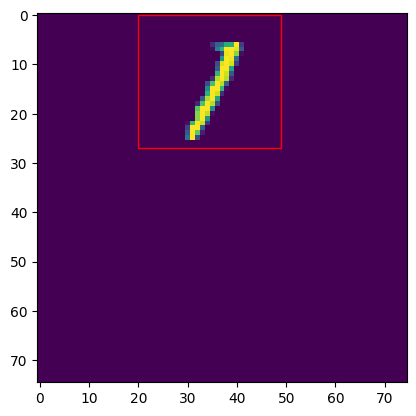

1500/1500 [==============================] - 435s 290ms/step - loss: 4.1626 - val_loss: 4.1084
Epoch 10/30
1/1 [==============================] - 0s 22ms/step


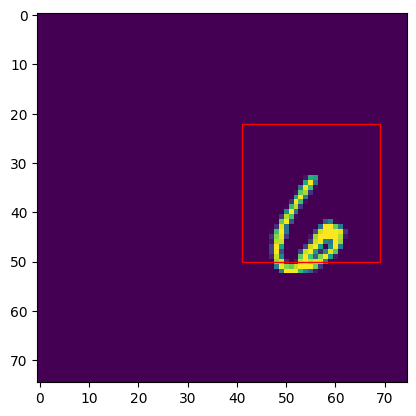

1500/1500 [==============================] - 431s 287ms/step - loss: 4.1259 - val_loss: 4.1827
Epoch 11/30
1/1 [==============================] - 0s 22ms/step


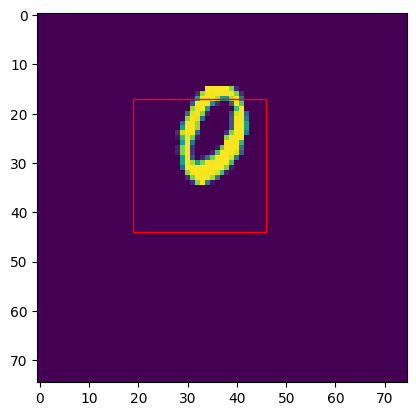

1500/1500 [==============================] - 420s 280ms/step - loss: 4.0826 - val_loss: 4.1665
Epoch 12/30
1/1 [==============================] - 0s 29ms/step


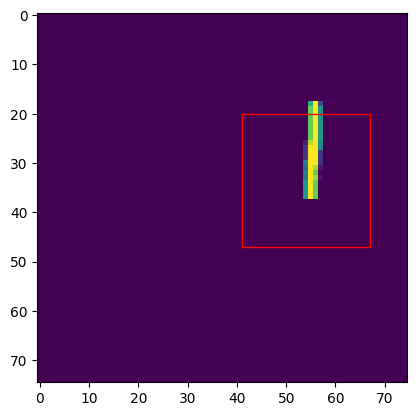

1500/1500 [==============================] - 422s 281ms/step - loss: 4.0621 - val_loss: 4.1881
Epoch 13/30
1/1 [==============================] - 0s 22ms/step


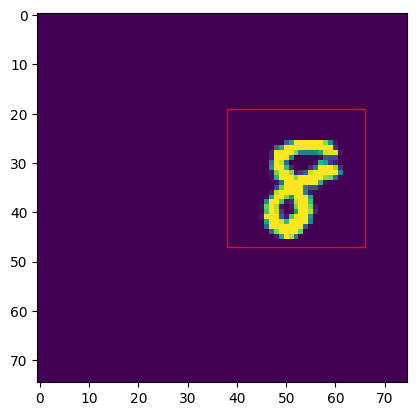

1500/1500 [==============================] - 421s 281ms/step - loss: 4.0297 - val_loss: 3.9791
Epoch 14/30
1/1 [==============================] - 0s 21ms/step


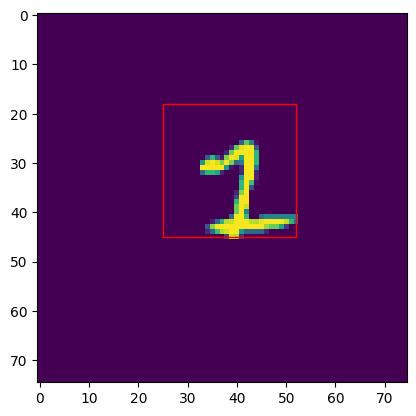

1500/1500 [==============================] - 422s 281ms/step - loss: 4.0021 - val_loss: 4.0687
Epoch 15/30
1/1 [==============================] - 0s 21ms/step


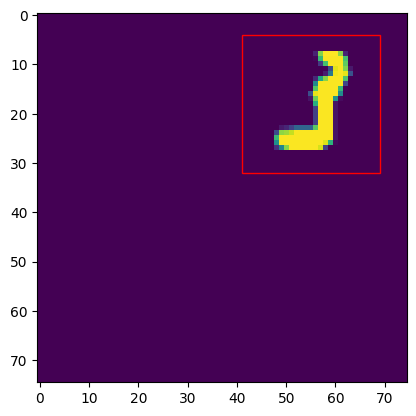

1500/1500 [==============================] - 420s 280ms/step - loss: 3.9698 - val_loss: 3.9826
Epoch 16/30
1/1 [==============================] - 0s 21ms/step


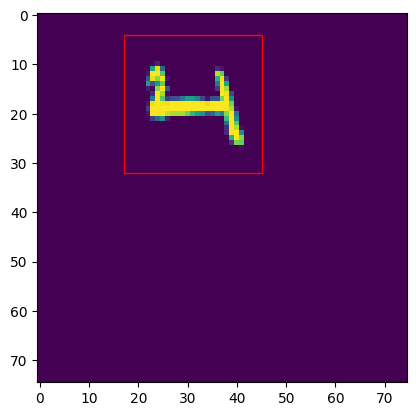

1500/1500 [==============================] - 422s 281ms/step - loss: 3.9599 - val_loss: 4.1679
Epoch 17/30
1/1 [==============================] - 0s 23ms/step


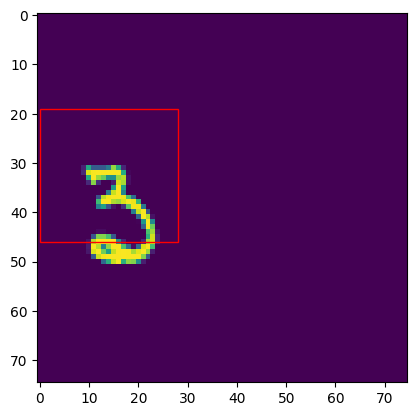

1500/1500 [==============================] - 421s 281ms/step - loss: 3.9376 - val_loss: 3.9785
Epoch 18/30
1/1 [==============================] - 0s 24ms/step


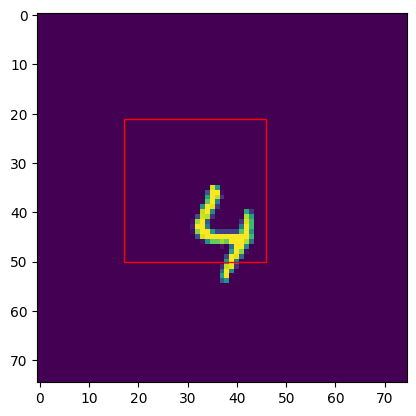

1500/1500 [==============================] - 421s 281ms/step - loss: 3.9128 - val_loss: 3.9469
Epoch 19/30
1/1 [==============================] - 0s 22ms/step


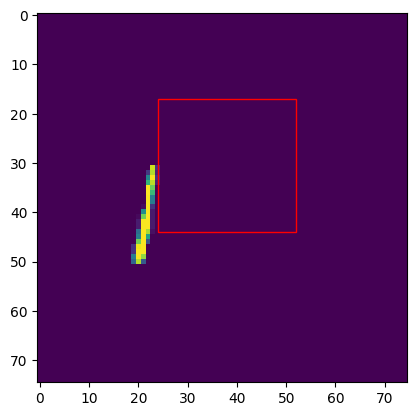

1500/1500 [==============================] - 426s 284ms/step - loss: 3.8842 - val_loss: 3.9511
Epoch 20/30
1/1 [==============================] - 0s 21ms/step


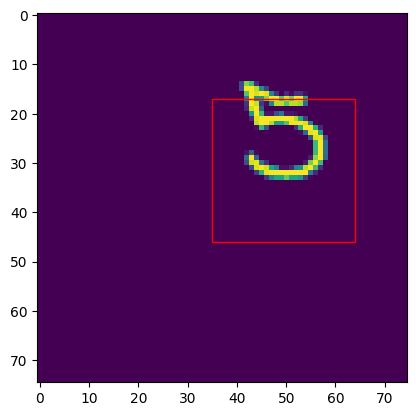

1500/1500 [==============================] - 424s 282ms/step - loss: 3.8617 - val_loss: 4.0159
Epoch 21/30
1/1 [==============================] - 0s 21ms/step


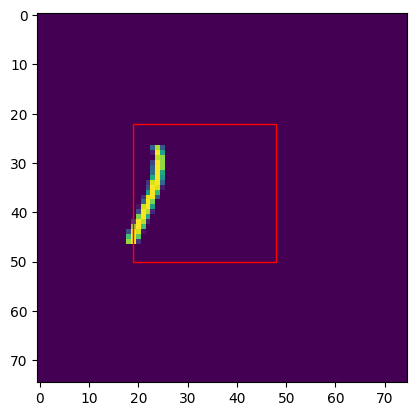

1500/1500 [==============================] - 424s 283ms/step - loss: 3.8718 - val_loss: 3.9156
Epoch 22/30
1/1 [==============================] - 0s 23ms/step


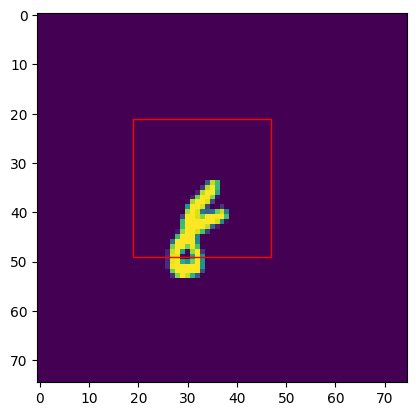

1500/1500 [==============================] - 440s 293ms/step - loss: 3.8469 - val_loss: 3.8563
Epoch 23/30
1/1 [==============================] - 0s 33ms/step


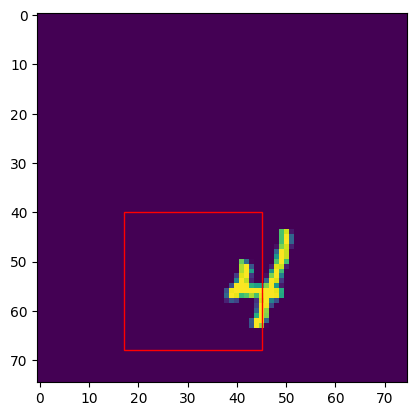

1500/1500 [==============================] - 426s 284ms/step - loss: 3.8267 - val_loss: 3.8803
Epoch 24/30
1/1 [==============================] - 0s 23ms/step


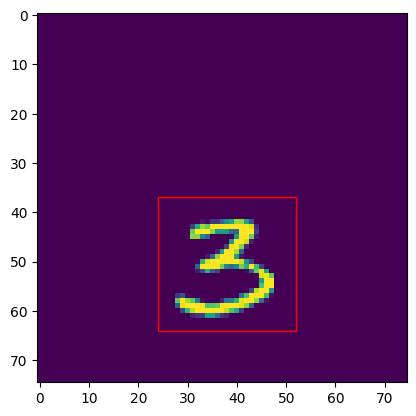

1500/1500 [==============================] - 426s 284ms/step - loss: 3.8152 - val_loss: 3.8048
Epoch 25/30
1/1 [==============================] - 0s 24ms/step


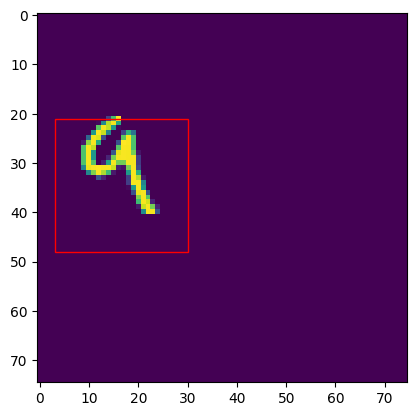

1500/1500 [==============================] - 427s 285ms/step - loss: 3.8120 - val_loss: 4.0078
Epoch 26/30
1/1 [==============================] - 0s 25ms/step


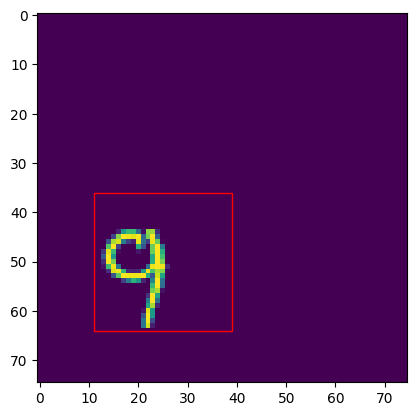

1500/1500 [==============================] - 427s 285ms/step - loss: 3.8043 - val_loss: 4.0088
Epoch 27/30
1/1 [==============================] - 0s 23ms/step


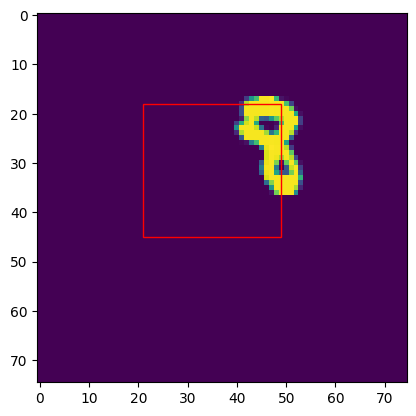

1500/1500 [==============================] - 426s 284ms/step - loss: 3.7816 - val_loss: 4.1220
Epoch 28/30
1/1 [==============================] - 0s 26ms/step


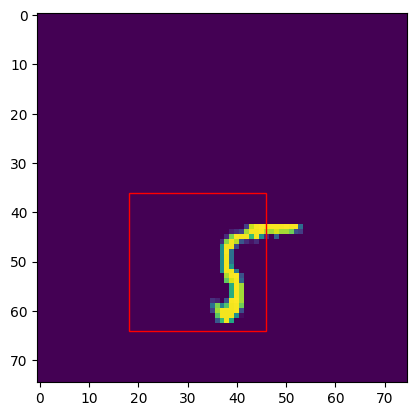

1500/1500 [==============================] - 428s 285ms/step - loss: 3.7718 - val_loss: 3.9592
Epoch 29/30
1/1 [==============================] - 0s 26ms/step


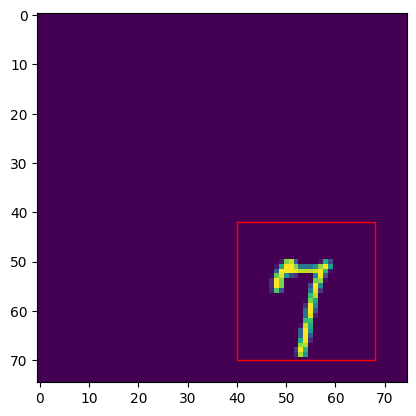

1500/1500 [==============================] - 426s 284ms/step - loss: 3.7475 - val_loss: 3.9560
Epoch 30/30
1/1 [==============================] - 0s 23ms/step


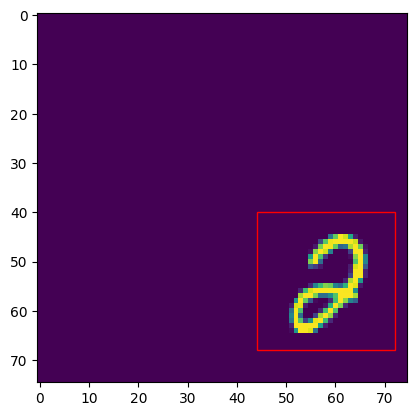

1500/1500 [==============================] - 424s 283ms/step - loss: 3.7551 - val_loss: 3.8328


In [27]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, callbacks=[CustomCallbacks()])

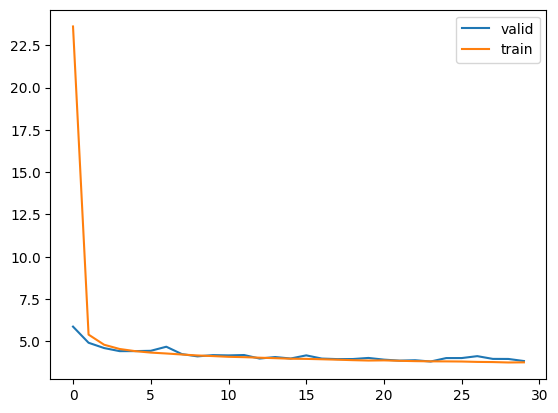

In [28]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.legend(["valid", "train"])
plt.show()

1/1 [==============================] - 0s 23ms/step


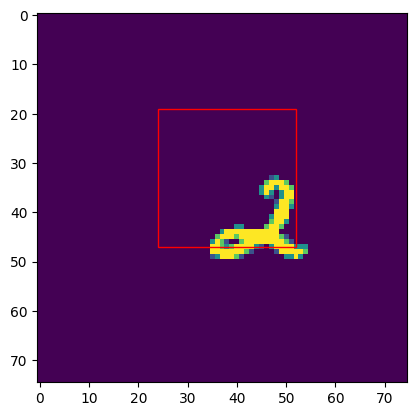

In [29]:
def plot_prediction(img_number):
  prediction = model.predict(x_test[img_number].reshape(1, 75, 75, 1))
  x1 = int(prediction[0][0])
  y1 = int(prediction[0][1])
  x2 = int(prediction[0][2])
  y2 = int(prediction[0][3])
  plt.imshow(x_test[img_number])
  plt.gca().add_patch(patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r',facecolor="none"))
  plt.show()
plot_prediction(30)